# Librairies

In [1]:
import glob
from pathlib import Path
import os
import sys
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import geopandas as gpd

from PIL import Image, ImageMath

import math

import warnings
import logging

from keras.layers import Input, Dense, Conv1D, Conv2D, concatenate, Flatten, MaxPooling2D, Dropout
from keras.models import Model, Sequential, load_model
from keras.optimizers import Adam, RMSprop, SGD
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.regularizers import l1 
from keras.initializers import Constant
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from sklearn.preprocessing import MinMaxScaler

from numpy.random import seed
seed(1)


/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
rootDir='/home/charles/Projects/NeuralNetPopulation'
sys.path.append("/home/charles/Projects/NeuralNetPopulation/Python")

from dataGeneration.dataGeneratorFactory import DataGeneratorFactory
from dataGeneration.rawDataInput import RawDataInput

from models.convNetParams import ConvNetParams
from models.mdlFit import MdlFit
from models.mdlEval import MdlEval
from models.mdlLayerInspection import MdlLayerInspection

from utils.pathBuilder import PathBuilder

# Parameters

In [3]:
provider = 'Mapbox'
gridSize = 100
resp="v_CA16_406"
penultimateNonLin ='elu'
finalNonLin='linear'
optimizerClass = Adam
lrInit=10**-2
numEpochs=20
finalFcUnits = 2**4 #try something smaller than the initial 16 to reduce the computational burden
lossFct='mean_squared_error' # mean_absolute_error
 

# Prep- number of dwellings

In [5]:
myPathBuilder = PathBuilder(rootDir,
                                provider,
                                gridSize)

myRawDataInput = RawDataInput(myPathBuilder,
                                  idGrid='gridId',
                                  provider=provider,
                                  gridSize=gridSize,
                                  resp=resp,
                                  ubNumTotal=50)  # consider all the data

myConvNetParams = ConvNetParams(provider=provider,
                                    gridSize=gridSize,
                                    resp=myRawDataInput.resp,
                                    dim=myRawDataInput.dim,
                                    numImgs=myRawDataInput.numImgs,
                                    penultimateNonLin =penultimateNonLin,
                                    finalNonLin=finalNonLin,
                                    finalFcUnits=finalFcUnits,
                                    lr=lrInit,
                                    numEpochs=numEpochs,
                                    batchSize=2 ** 5,
                                    l1Coeff=0,
                                    dropoutRate=0,
                                    convNetClass=VGG19,
                                    lossFct='mean_squared_error',
                                    optimizerClass=optimizerClass,
                                    scalerClass=MinMaxScaler,
                                    extraStrId='',
                                    shuffle=False,
                                    verbose=True)

myDatageneratorFactory = DataGeneratorFactory(myRawDataInput,
                                                  myConvNetParams,
                                                  myPathBuilder)



Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/PredictionError/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/Partition/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Figures/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/FinalModel/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/ModelHistory/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Log/mdlFittingLogs/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/Checkpoint/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/FeatureMaps/Mapbox/100 already exists
All train, test, valid indices already exist for v_CA16_406_VGG19_grS_100nEpo_20nImg_50_opt_AdamflNoLi_linear_pUNoLi_elulFct_mean_squared_error_flFcUn_16_sdLstNonLi_elu_pUFcUn_16


# Prep- poverty

In [7]:
myPathBuilder = PathBuilder(rootDir,
                                provider,
                                gridSize)

myRawDataInputPoverty = RawDataInput(myPathBuilder,
                                  idGrid='gridId',
                                  provider=provider,
                                  gridSize=gridSize,
                                  resp='v_CA16_2540',
                                  ubNumTotal=50)  # consider all the data

myConvNetParamsPoverty = ConvNetParams(provider=provider,
                                    gridSize=gridSize,
                                    resp=myRawDataInputPoverty.resp,
                                    dim=myRawDataInputPoverty.dim,
                                    numImgs=myRawDataInputPoverty.numImgs,
                                    penultimateNonLin =penultimateNonLin,
                                    finalNonLin=finalNonLin,
                                    finalFcUnits=finalFcUnits,
                                    lr=lrInit,
                                    numEpochs=numEpochs,
                                    batchSize=2 ** 5,
                                    l1Coeff=0,
                                    dropoutRate=0,
                                    convNetClass=VGG19,
                                    lossFct='mean_squared_error',
                                    optimizerClass=optimizerClass,
                                    scalerClass=MinMaxScaler,
                                    extraStrId='',
                                    shuffle=False,
                                    verbose=True)

myDatageneratorFactoryPoverty = DataGeneratorFactory(myRawDataInputPoverty,
                                                  myConvNetParams,
                                                  myPathBuilder)



Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/PredictionError/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/Partition/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Figures/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/FinalModel/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/ModelHistory/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Log/mdlFittingLogs/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/Checkpoint/Mapbox/100 already exists
Directory /home/charles/Projects/NeuralNetPopulation/Data/Models/FeatureMaps/Mapbox/100 already exists
All train, test, valid indices already exist for v_CA16_406_VGG19_grS_100nEpo_20nImg_50_opt_AdamflNoLi_linear_pUNoLi_elulFct_mean_squared_error_flFcUn_16_sdLstNonLi_elu_pUFcUn_16


# Models - over and under parameterized

In [9]:
        #Instantiate the conv net (vgg, resnet, etc.)
        with warnings.catch_warnings () :
            convNetExtractor = VGG19(include_top=False, 
                                       weights='imagenet',
                                       input_shape= (480,480,3) )
 
            
        
        #Fix the base layers-> use for feature extraction
        numLayers=len(convNetExtractor.layers)
        for k, layer in enumerate(convNetExtractor.layers):
            layer.trainable = False

        # Conv net/feature extractor output- check out the artRecognition.mdlFit.mdlFinal.py for an alternative less verbose tehnique
        inputTensorFeatExtractor = convNetExtractor.layers[0].input
        outputTensorFeatExtractor = convNetExtractor.layers[len(convNetExtractor.layers)-1].output
        mdlFeatExtractor = Model(inputTensorFeatExtractor, outputTensorFeatExtractor)
        outputMdlInit=mdlFeatExtractor(inputTensorFeatExtractor)

        #Flatten them + use these for prediction
        flatLyr = Flatten(name='flatten')(outputMdlInit)

        penultimateDenseLyr = Dense(units=16, #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc1'  )(flatLyr)

        #Just one fully connected layers 
        #Try with L1 norm one and/or drop out if evidence of overfiting an poor generalsation power 
        finalDenseLyr = Dense(units=16 , #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc2' , 
                               )(penultimateDenseLyr)
        

 
     
        finalOutput = Dense(1,
                            name='predictions',
                            activation='linear',
                            kernel_initializer='he_uniform' )(finalDenseLyr)

        #Final model
        convNetMdlCustom = Model(inputTensorFeatExtractor, finalOutput )

        #Nmber of params
        convNetMdlCustom.summary()
        
        #Set the loss
        optInst=Adam(lr=10**-2)
        convNetMdlCustom.compile(loss='mean_squared_error' , optimizer=optInst)

In [10]:
        #Instantiate the conv net (vgg, resnet, etc.)
        with warnings.catch_warnings () :
            convNetExtractor = VGG19(include_top=False, 
                                       weights='imagenet',
                                       input_shape= (480,480,3) )
 
            
        
        #Fix the base layers-> use for feature extraction
        numLayers=len(convNetExtractor.layers)
        for k, layer in enumerate(convNetExtractor.layers):
            layer.trainable = False

        # Conv net/feature extractor output- check out the artRecognition.mdlFit.mdlFinal.py for an alternative less verbose tehnique
        inputTensorFeatExtractor = convNetExtractor.layers[0].input
        outputTensorFeatExtractor = convNetExtractor.layers[len(convNetExtractor.layers)-1].output
        mdlFeatExtractor = Model(inputTensorFeatExtractor, outputTensorFeatExtractor)
        outputMdlInit=mdlFeatExtractor(inputTensorFeatExtractor)

        #Flatten them + use these for prediction
        flatLyr = Flatten(name='flatten')(outputMdlInit)
 
        #Just one fully connected layers 
        #Try with L1 norm one and/or drop out if evidence of overfiting an poor generalsation power 
        finalDenseLyr = Dense(units=16 , #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc2' , 
                               )(flatLyr)
        

 
     
        finalOutput = Dense(1,
                            name='predictions',
                            activation='linear',
                            kernel_initializer='he_uniform' )(finalDenseLyr)

        #Final model
        convNetMdlCustomLessCapacity = Model(inputTensorFeatExtractor, finalOutput )


        #Set the loss
        optInst=Adam(lr=10**-2)
        convNetMdlCustomLessCapacity.compile(loss='mean_squared_error' , optimizer=optInst)

# Data generation

In [12]:
dictTrainTestValid = myDatageneratorFactory.getTrainTestValidDataGenerators()
dictTrainTestValidPoverty =myDatageneratorFactoryPoverty.getTrainTestValidDataGenerators()

The number of indices must be at least as large as the batch size! Cannot consider a batch of size 28 with only 28 items
Using a scale factor of 255.0 in DataGenerator
The number of indices must be at least as large as the batch size! Cannot consider a batch of size 8 with only 8 items
Using a scale factor of 255.0 in DataGenerator
The number of indices must be at least as large as the batch size! Cannot consider a batch of size 6 with only 6 items
Using a scale factor of 255.0 in DataGenerator
The number of indices must be at least as large as the batch size! Cannot consider a batch of size 28 with only 28 items
Using a scale factor of 255.0 in DataGenerator
The number of indices must be at least as large as the batch size! Cannot consider a batch of size 8 with only 8 items
Using a scale factor of 255.0 in DataGenerator
The number of indices must be at least as large as the batch size! Cannot consider a batch of size 6 with only 6 items
Using a scale factor of 255.0 in DataGenerator


In [13]:
dictTrainTestValid['train'].yScaled[:5]

array([[0.23082719],
       [0.4262506 ],
       [0.82548631],
       [0.20560051],
       [0.75282258]])

In [14]:
dictTrainTestValidPoverty['train'].yScaled[:5]

array([[0.56070409],
       [0.2426204 ],
       [0.2525514 ],
       [0.05690926],
       [0.13219567]])

# fit - dwellings

In [16]:
mdlHist= convNetMdlCustom.fit(dictTrainTestValid['train'],epochs=numEpochs)
mdlHist2= convNetMdlCustomLessCapacity.fit(dictTrainTestValid['train'],epochs=numEpochs)

Epoch 1/20
1/1 [==============================] - 0s 14ms/step - loss: 0.1987
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 697.5595
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 1198.6783
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 894.9401
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 274.3899
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6151
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 234.9378
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 418.9651
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 215.8112
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 7.6992
Epoch 11/20
1/1 [==============================] - 0s 2ms/step - loss: 100.8991
Epoch 12/20
1/1 [==============================] - 0s 2ms/step - loss: 223.4319
Epoch 13/20
1/1 [==============================] - 0s

# History plot - dwellings

In [17]:
dfHist=pd.DataFrame(mdlHist.history)
dfHist['id'] = 'modelMoreCapacity'
dfHist['epoch'] = np.arange(dfHist.shape[0])

dfHist2=pd.DataFrame(mdlHist2.history)
dfHist2['id'] = 'modelLessCapacity'
dfHist2['epoch'] = np.arange(dfHist2.shape[0])

dfHistBoth=pd.concat([dfHist,dfHist2])
dfHistBoth.head()

loss                 id  epoch
0     0.198693  modelMoreCapacity      0
1   697.559509  modelMoreCapacity      1
2  1198.678345  modelMoreCapacity      2
3   894.940125  modelMoreCapacity      3
4   274.389923  modelMoreCapacity      4

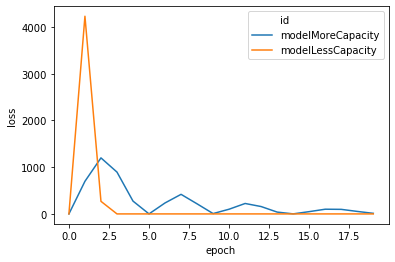

In [18]:
sns.lineplot(x='epoch',y='loss', hue='id' , data=dfHistBoth)

In [19]:
dfHistBoth['logloss'] = dfHistBoth['loss'].apply(lambda x: np.log(x))

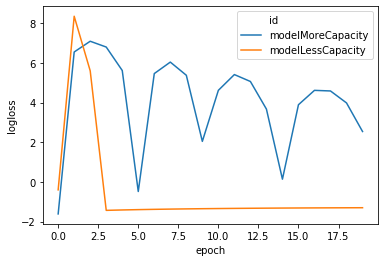

In [20]:
sns.lineplot(x='epoch',y='logloss', hue='id' , data=dfHistBoth)

# Predictions - dwellings

In [22]:
dfPred=pd.DataFrame(convNetMdlCustom.predict(dictTrainTestValid['train']),columns=['pred'])
dfPred['id'] = 'modelMoreCapacity'
dfPred['obs'] = dictTrainTestValid['train'].yScaled

dfPred2=pd.DataFrame(convNetMdlCustomLessCapacity.predict(dictTrainTestValid['train']),columns=['pred'])
dfPred['id'] = 'modelLessCapacity'
dfPred['obs'] = dictTrainTestValid['train'].yScaled


Text(0.5, 1.0, 'Number of dwellings prediction')

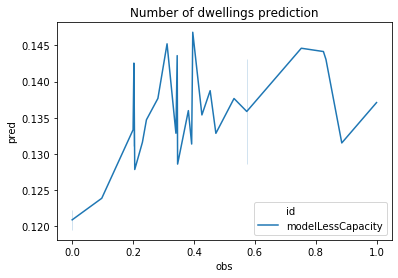

In [23]:
dfPredBoth=pd.concat([dfPred,dfPred2])
dfPredBoth.head()
sns.lineplot(x='obs',y='pred', hue='id' , data=dfPredBoth)
plt.title("Number of dwellings prediction")

---
---

# Poverty

In [25]:
        #Instantiate the conv net (vgg, resnet, etc.)
        with warnings.catch_warnings () :
            convNetExtractor = VGG19(include_top=False, 
                                       weights='imagenet',
                                       input_shape= (480,480,3) )
 
            
        
        #Fix the base layers-> use for feature extraction
        numLayers=len(convNetExtractor.layers)
        for k, layer in enumerate(convNetExtractor.layers):
            layer.trainable = False

        # Conv net/feature extractor output- check out the artRecognition.mdlFit.mdlFinal.py for an alternative less verbose tehnique
        inputTensorFeatExtractor = convNetExtractor.layers[0].input
        outputTensorFeatExtractor = convNetExtractor.layers[len(convNetExtractor.layers)-1].output
        mdlFeatExtractor = Model(inputTensorFeatExtractor, outputTensorFeatExtractor)
        outputMdlInit=mdlFeatExtractor(inputTensorFeatExtractor)

        #Flatten them + use these for prediction
        flatLyr = Flatten(name='flatten')(outputMdlInit)

        penultimateDenseLyr = Dense(units=16, #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc1'  )(flatLyr)

        #Just one fully connected layers 
        #Try with L1 norm one and/or drop out if evidence of overfiting an poor generalsation power 
        finalDenseLyr = Dense(units=16 , #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc2' , 
                               )(penultimateDenseLyr)
        

 
     
        finalOutput = Dense(1,
                            name='predictions',
                            activation='linear',
                            kernel_initializer='he_uniform' )(finalDenseLyr)

        #Final model
        convNetMdlCustomPoverty = Model(inputTensorFeatExtractor, finalOutput )


        #Set the loss
        optInst=Adam(lr=10**-2)
        convNetMdlCustomPoverty.compile(loss='mean_squared_error' , optimizer=optInst)

In [26]:
        #Instantiate the conv net (vgg, resnet, etc.)
        with warnings.catch_warnings () :
            convNetExtractor = VGG19(include_top=False, 
                                       weights='imagenet',
                                       input_shape= (480,480,3) )
 
            
        
        #Fix the base layers-> use for feature extraction
        numLayers=len(convNetExtractor.layers)
        for k, layer in enumerate(convNetExtractor.layers):
            layer.trainable = False

        # Conv net/feature extractor output- check out the artRecognition.mdlFit.mdlFinal.py for an alternative less verbose tehnique
        inputTensorFeatExtractor = convNetExtractor.layers[0].input
        outputTensorFeatExtractor = convNetExtractor.layers[len(convNetExtractor.layers)-1].output
        mdlFeatExtractor = Model(inputTensorFeatExtractor, outputTensorFeatExtractor)
        outputMdlInit=mdlFeatExtractor(inputTensorFeatExtractor)

        #Flatten them + use these for prediction
        flatLyr = Flatten(name='flatten')(outputMdlInit)
 
        #Just one fully connected layers 
        #Try with L1 norm one and/or drop out if evidence of overfiting an poor generalsation power 
        finalDenseLyr = Dense(units=16 , #usually 2**4
                              activation='relu',
                              kernel_initializer='he_uniform',
                              name='fc2' , 
                               )(flatLyr)
        

 
     
        finalOutput = Dense(1,
                            name='predictions',
                            activation='linear',
                            kernel_initializer='he_uniform' )(finalDenseLyr)

        #Final model
        convNetMdlCustomLessCapacityPoverty = Model(inputTensorFeatExtractor, finalOutput )


        #Set the loss
        optInst=Adam(lr=10**-2)
        convNetMdlCustomLessCapacityPoverty.compile(loss='mean_squared_error' , optimizer=optInst)

# Fit - poverty

In [27]:
mdlHist= convNetMdlCustomPoverty.fit(dictTrainTestValidPoverty['train'],epochs=numEpochs)
mdlHist2= convNetMdlCustomLessCapacityPoverty.fit(dictTrainTestValidPoverty['train'],epochs=numEpochs)

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 2.7530
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 13008.5908
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 2101.7786
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 754.1871
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 1120.5022
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 1365.8750
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 81.7450
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 552.7023
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 994.2112
Epoch 10/20
1/1 [==============================] - 0s 2ms/step - loss: 204.6095
Epoch 11/20
1/1 [==============================] - 0s 2ms/step - loss: 144.7684
Epoch 12/20
1/1 [==============================] - 0s 3ms/step - loss: 701.8432
Epoch 13/20
1/1 [=============================

In [28]:
dfHist=pd.DataFrame(mdlHist.history)
dfHist['id'] = 'modelMoreCapacity'
dfHist['epoch'] = np.arange(dfHist.shape[0])

dfHist2=pd.DataFrame(mdlHist2.history)
dfHist2['id'] = 'modelLessCapacity'
dfHist2['epoch'] = np.arange(dfHist2.shape[0])

dfHistBoth=pd.concat([dfHist,dfHist2])
dfHistBoth.head()

loss                 id  epoch
0      2.753010  modelMoreCapacity      0
1  13008.590820  modelMoreCapacity      1
2   2101.778564  modelMoreCapacity      2
3    754.187073  modelMoreCapacity      3
4   1120.502197  modelMoreCapacity      4

Text(0.5, 1.0, 'Poverty prediction')

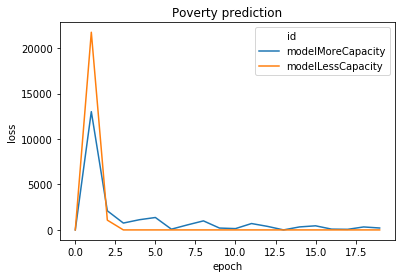

In [29]:
sns.lineplot(x='epoch',y='loss', hue='id' , data=dfHistBoth)
plt.title("Poverty prediction")

In [30]:
dfHistBoth['logloss'] = dfHistBoth['loss'].apply(lambda x: np.log(x))

Text(0.5, 1.0, 'Poverty prediction')

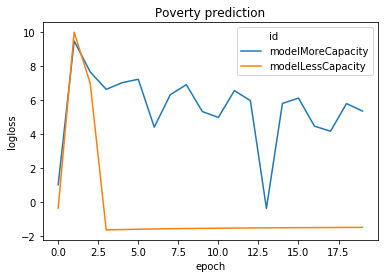

In [31]:
sns.lineplot(x='epoch',y='logloss', hue='id' , data=dfHistBoth)
plt.title("Poverty prediction")

# Predictions - poverty

In [36]:
dfPred=pd.DataFrame(convNetMdlCustomPoverty.predict(dictTrainTestValid['train']))
dfPred['id'] = 'modelMoreCapacity'
dfPred['obs'] = dictTrainTestValid['train'].yScaled

dfPred2=pd.DataFrame(convNetMdlCustomLessCapacityPoverty.predict(dictTrainTestValid['train']))
dfPred['id'] = 'modelLessCapacity'
dfPred['obs'] = dictTrainTestValid['train'].yScaled

dfPredBoth=pd.concat([dfPred,dfPred2])
dfPredBoth.head()

0                 id       obs
0  1.690619  modelLessCapacity  0.230827
1  1.693198  modelLessCapacity  0.426251
2  1.475982  modelLessCapacity  0.825486
3  1.955474  modelLessCapacity  0.205601
4  1.575530  modelLessCapacity  0.752823

In [37]:
sns.lineplot(x='obs',y='pred', hue='id' , data=dfPredBoth)

ValueError: Could not interpret input 'pred'